In [1]:
# Cargamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

## Ejercicio 2 

Cada día se tienen 20 ensayos Bernoulli, lo que se convierte en un ensayo binomial cuando se analiza por día.

Primer día ----- 2 defectuosos

## Ejercicio 3 German Credit

In [2]:
GermanCredit = pd.read_csv('/home/vega/Escritorio/ing_calidad/GermanCredit.csv')

In [3]:
GermanCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Unnamed: 0                              1000 non-null   int64 
 1   Duration                                1000 non-null   int64 
 2   Amount                                  1000 non-null   int64 
 3   InstallmentRatePercentage               1000 non-null   int64 
 4   ResidenceDuration                       1000 non-null   int64 
 5   Age                                     1000 non-null   int64 
 6   NumberExistingCredits                   1000 non-null   int64 
 7   NumberPeopleMaintenance                 1000 non-null   int64 
 8   Telephone                               1000 non-null   int64 
 9   ForeignWorker                           1000 non-null   int64 
 10  Class                                   1000 non-null   object
 11  Check

In [4]:
profile = ProfileReport(GermanCredit, title = "Análisis explotario de datos")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Ejercicio 4 Strongx

In [5]:
strongx = pd.read_csv('/home/vega/Escritorio/ing_calidad/strongx.csv')
strongx

momentum  energy  crossx  sd
0         4   0.345     367  17
1         6   0.287     311   9
2         8   0.251     295   9
3        10   0.225     268   7
4        12   0.207     253   7
5        15   0.186     239   6
6        20   0.161     220   6
7        30   0.132     213   6
8        75   0.084     193   5
9       150   0.060     192   5

In [6]:
momentum = strongx['momentum']
energy = strongx['energy']
crossx = strongx['crossx']
sd = strongx['sd']

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

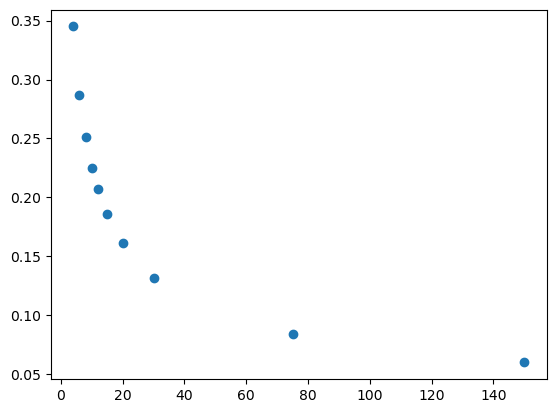

In [8]:
plt.scatter(momentum,energy)
plt.show()

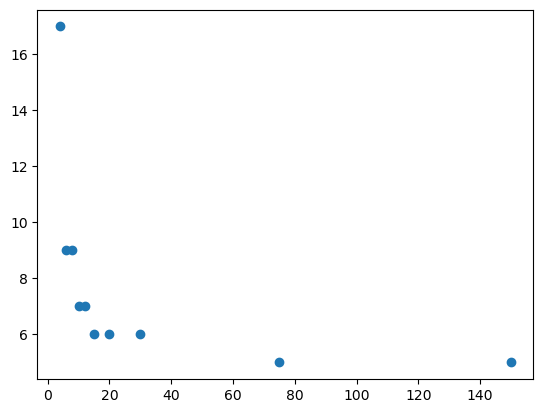

In [9]:
plt.scatter(momentum,sd)
plt.show()

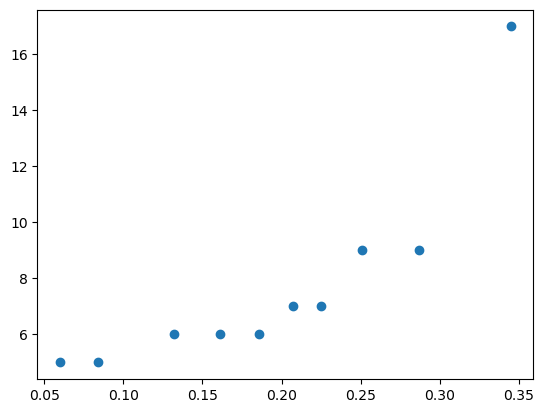

In [10]:
plt.scatter(energy,sd)
plt.show()

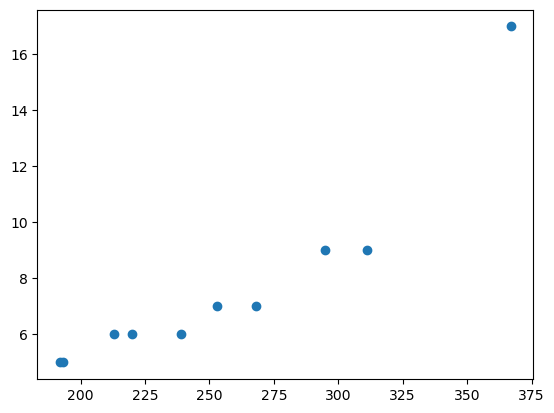

In [11]:
plt.scatter(crossx,sd)
plt.show()

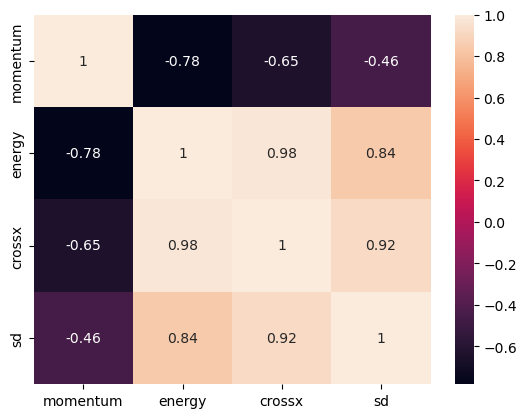

In [12]:
matriz_corr = strongx.corr(method = 'pearson')
sns.heatmap(matriz_corr, annot=True)
#plt.matshow(matriz_corr)
plt.show()

In [13]:
profile = ProfileReport(strongx, title = "Análisis explotario de datos")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
#strongx['sd'] = strongx['sd'].astype('float64')

### Modelo

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [30]:
# División de los datos en train y test
X = strongx[['energy']]
y = strongx['crossx']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = .8,
                                        random_state = 1234,
                                        shuffle      = True)

In [32]:
X_train = sm.add_constant(X_train, prepend=True)
modelo1 = sm.OLS(endog=y_train, exog=X_train,)
modelo1 = modelo1.fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     114.6
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           3.92e-05
Time:                        09:45:08   Log-Likelihood:                -31.561
No. Observations:                   8   AIC:                             67.12
Df Residuals:                       6   BIC:                             67.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.4093     12.230     11.153      0.0

In [33]:
# Intervalos de confianza para los coeficientes del modelo
intervalos_ci = modelo1.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

2.5%       97.5%
const   106.482605  166.335968
energy  472.135500  751.949014

### Análisis de residuos

In [34]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
y_train = y_train.flatten()
prediccion_train = modelo1.predict(exog = X_train)
residuos_train = prediccion_train - y_train

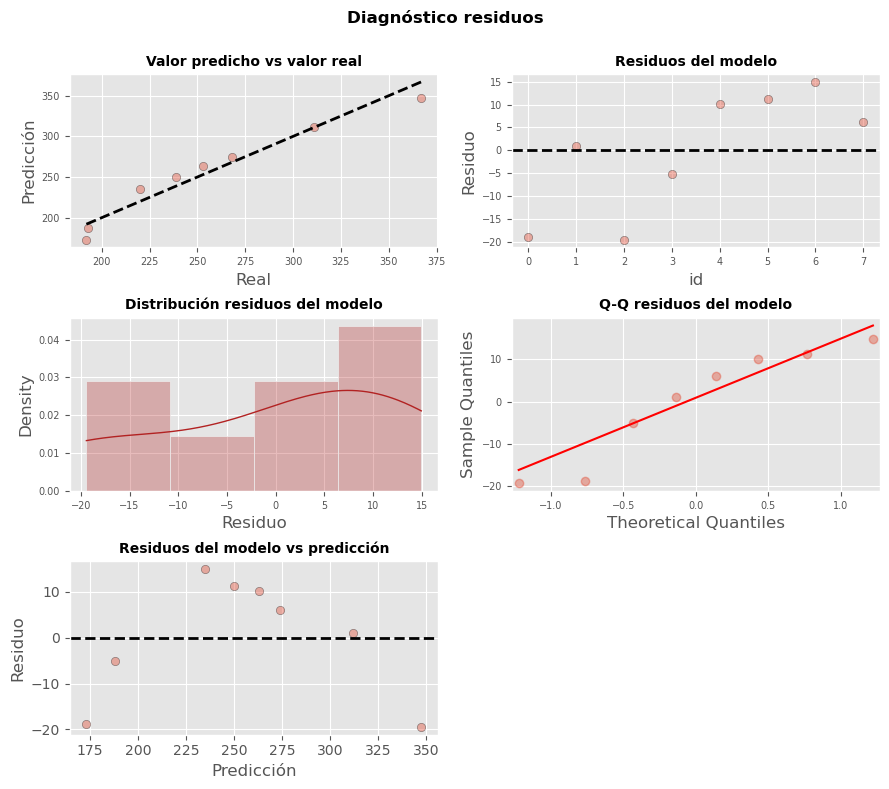

In [38]:
# Gráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = False,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 10)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

## Ejercicio 5 Anscombe

In [2]:
anscombe = pd.read_csv('/home/vega/Escritorio/ing_calidad/anscombe.csv')
anscombe

Unnamed: 0  x1  x2  x3  x4     y1    y2     y3     y4
0            1  10  10  10   8   8.04  9.14   7.46   6.58
1            2   8   8   8   8   6.95  8.14   6.77   5.76
2            3  13  13  13   8   7.58  8.74  12.74   7.71
3            4   9   9   9   8   8.81  8.77   7.11   8.84
4            5  11  11  11   8   8.33  9.26   7.81   8.47
5            6  14  14  14   8   9.96  8.10   8.84   7.04
6            7   6   6   6   8   7.24  6.13   6.08   5.25
7            8   4   4   4  19   4.26  3.10   5.39  12.50
8            9  12  12  12   8  10.84  9.13   8.15   5.56
9           10   7   7   7   8   4.82  7.26   6.42   7.91
10          11   5   5   5   8   5.68  4.74   5.73   6.89

In [16]:
profile5 = ProfileReport(anscombe, title = "Análisis explotario de datos")
profile5

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
x1 = anscombe['x1']
x2 = anscombe['x2']
x3 = anscombe['x3']
x4 = anscombe['x4']
y1 = anscombe['y1']
y2 = anscombe['y2']
y3 = anscombe['y3']
y4 = anscombe['y4']

Text(0, 0.5, 'y4')

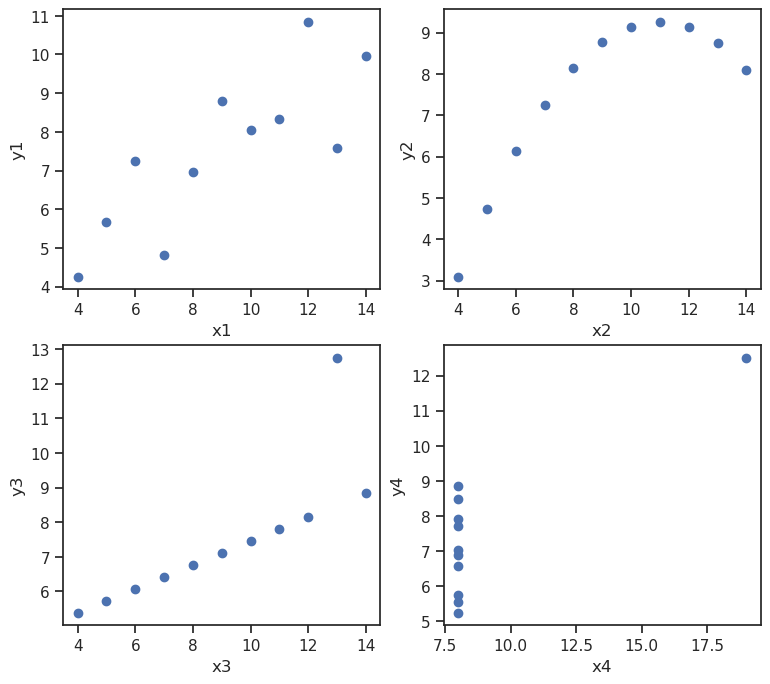

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))
axes[0,0].scatter(x1,y1)
axes[0, 0].set_xlabel('x1')
axes[0, 0].set_ylabel('y1')
axes[0,1].scatter(x2,y2)
axes[0, 1].set_xlabel('x2')
axes[0, 1].set_ylabel('y2')
axes[1,0].scatter(x3,y3)
axes[1, 0].set_xlabel('x3')
axes[1, 0].set_ylabel('y3')
axes[1,1].scatter(x4,y4)
axes[1, 1].set_xlabel('x4')
axes[1, 1].set_ylabel('y4')

### Modelo 1

In [4]:
# División de los datos en train y test
X = anscombe[['x1']]
y = anscombe['y1']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)

In [5]:
X_train = sm.add_constant(X_train, prepend=True)
modelo1 = sm.OLS(endog=y_train, exog=X_train,)
modelo1 = modelo1.fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     33.46
Date:                Wed, 25 Jan 2023   Prob (F-statistic):            0.00117
Time:                        10:22:19   Log-Likelihood:                -8.0180
No. Observations:                   8   AIC:                             20.04
Df Residuals:                       6   BIC:                             20.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2303      0.771      4.190      0.0

In [8]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
y_train = y_train.flatten()
prediccion_train = modelo1.predict(exog = X_train)
residuos_train = prediccion_train - y_train

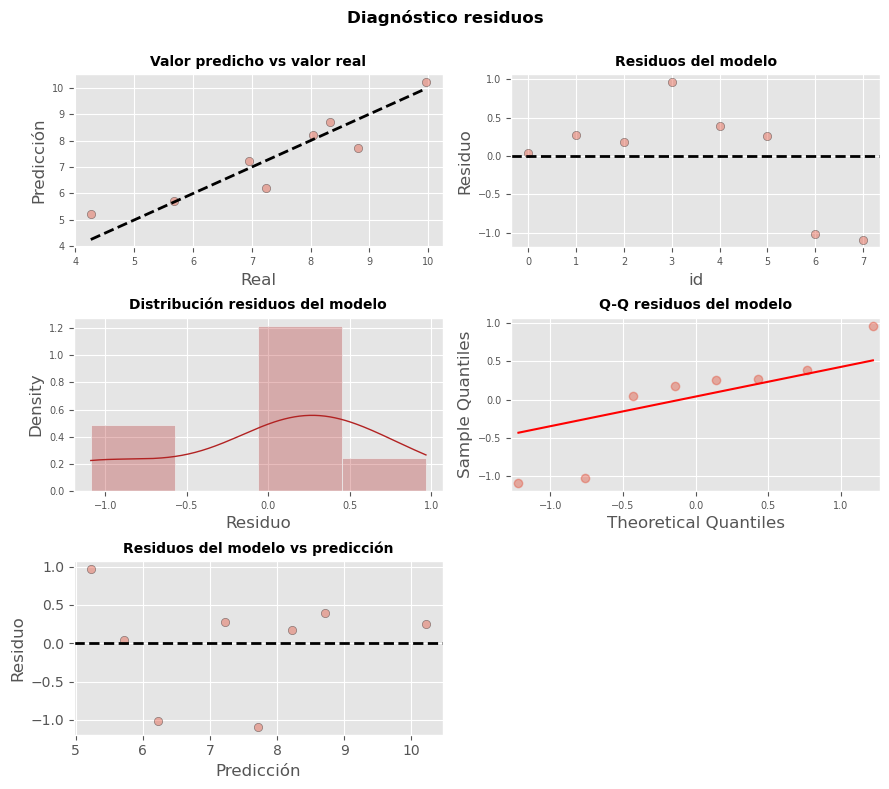

In [9]:
# Gráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = False,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 10)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

### Modelo 2

In [13]:
# División de los datos en train y test
X = anscombe[['x2']]
y = anscombe['y2']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)

In [14]:
X_train = sm.add_constant(X_train, prepend=True)
modelo2 = sm.OLS(endog=y_train, exog=X_train,)
modelo2 = modelo2.fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     11.52
Date:                Wed, 25 Jan 2023   Prob (F-statistic):             0.0146
Time:                        10:27:26   Log-Likelihood:                -13.100
No. Observations:                   8   AIC:                             30.20
Df Residuals:                       6   BIC:                             30.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5446      1.455      1.749      0.1

In [15]:
y_train = y_train.flatten()
prediccion_train = modelo2.predict(exog = X_train)
residuos_train = prediccion_train - y_train

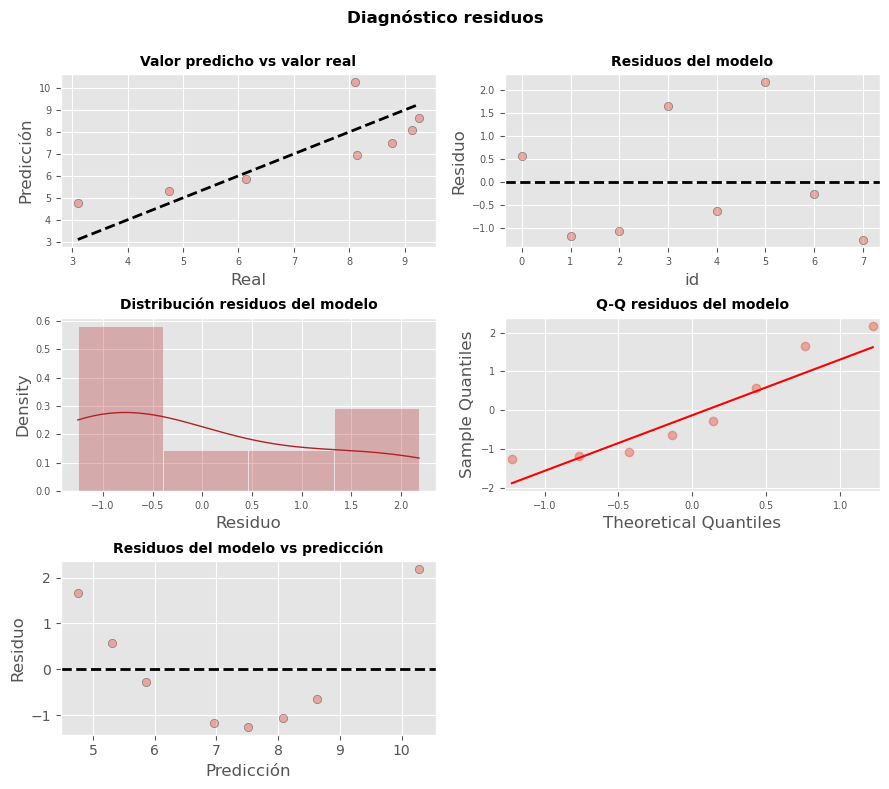

In [16]:
# Gráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = False,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 10)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

### Modelo 3

In [20]:
# División de los datos en train y test
X = anscombe[['x3']]
y = anscombe['y3']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)

In [21]:
X_train = sm.add_constant(X_train, prepend=True)
modelo3 = sm.OLS(endog=y_train, exog=X_train,)
modelo3 = modelo3.fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.902e+05
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           9.57e-17
Time:                        10:35:00   Log-Likelihood:                 35.681
No. Observations:                   8   AIC:                            -67.36
Df Residuals:                       6   BIC:                            -67.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0065      0.003   1224.741      0.0

In [22]:
y_train = y_train.flatten()
prediccion_train = modelo3.predict(exog = X_train)
residuos_train = prediccion_train - y_train

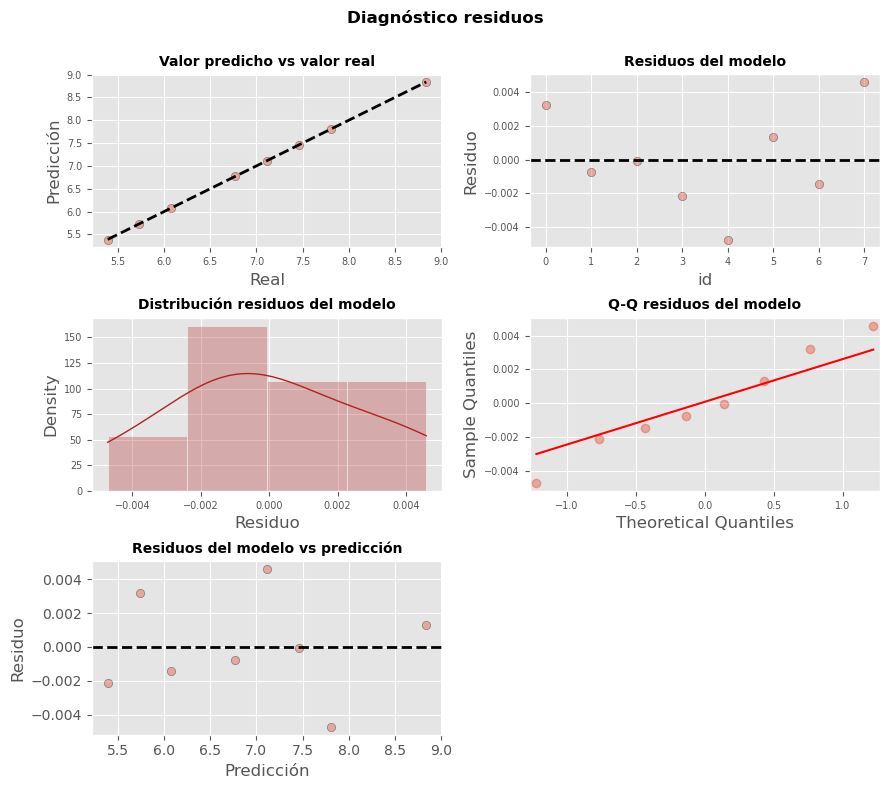

In [23]:
# Gráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = False,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 10)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

### Modelo 4

In [24]:
# División de los datos en train y test
X = anscombe[['x4']]
y = anscombe['y4']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)

In [25]:
X_train = sm.add_constant(X_train, prepend=True)
modelo4 = sm.OLS(endog=y_train, exog=X_train,)
modelo4 = modelo4.fit()
print(modelo4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     15.51
Date:                Wed, 25 Jan 2023   Prob (F-statistic):            0.00764
Time:                        10:35:26   Log-Likelihood:                -12.375
No. Observations:                   8   AIC:                             28.75
Df Residuals:                       6   BIC:                             28.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9581      1.283      2.306      0.0

In [26]:
y_train = y_train.flatten()
prediccion_train = modelo4.predict(exog = X_train)
residuos_train = prediccion_train - y_train

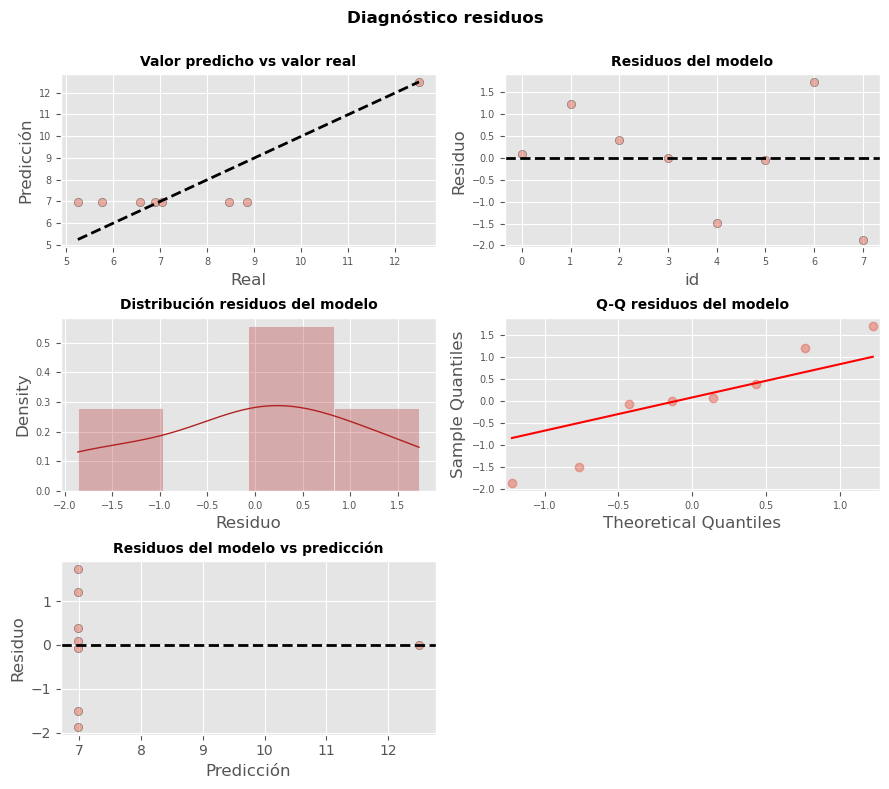

In [27]:
# Gráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = False,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 10)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Supuestos:
- Que exista una función que relacione las variables
- Que exista aleatoriedad
- Causas raíces